***
# Starting Kit - Black Swan HiggsML Course
***

## Setup
`COLAB` determines whether this notebook is running on Google Colab.

In [1]:
COLAB = 'google.colab' in str(get_ipython())

In [2]:
if COLAB:
    ! git clone https://github.com/blackSwanCS/Collaboration_A 
    %cd Collaboration_A

# HiggsML utility package should not be modified
# %pip install HiggsML 
    

### Imports

In [4]:
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys
warnings.filterwarnings("ignore")

### Directories

In [ ]:

root_dir = os.getcwd()
print("Root directory is", root_dir)

input_dir = os.path.join(root_dir, "sample_data")
output_dir = os.path.join(root_dir, "sample_result_submission")
submission_dir = os.path.join(root_dir, "sample_code_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    

Root directory is /home/chakkappai/Work/ST4_CS/Collaboration_A



### Add directories to path

In [6]:
path.append(submission_dir)

In [7]:
import HiggsML.visualization as visualization

## Import Submission Model
We import a class named `Model` from the submission file (`model.py`). This `Model` class has the following methods:
- `init`: receives train set and systematics class as input
- `fit`: can be used for training
- `predict`: receives one test set and outputs a dictionary with the following keys
    - `mu_hat` : predicted mu $\hat{\mu}$
    - `delta_mu_hat`: $\Delta{\hat{\mu}}$ bound for $\mu$
    - `p16`: 16th percentile
    - `p84`: 84th percentile

In this example code, the `Model` class implements a basic model with 2 different model trained to predict the class label. 

* 1 XGBoost BDT ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/boosted_decision_tree.py) )
* 2 Tebsorflow NN  ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/neural_network.py) )

The feature engineering is in where you can include derived quantities and decide which feature should be needed. ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/feature_engineering.py) ) 

the statistical analysis part is where yoiu write the mu finding calculation using the output of the classifier. ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/statistical_analysis.py) ) 

If running in Collab, click the folder icon in the left sidebar to open the file browser.


In [8]:
from model import Model

## Data

In [9]:
from HiggsML.datasets import Neurips2024_public_dataset as public_dataset
data = public_dataset()

### ⚠️ Note:
The data used here is a small subset of the full data is for demonstration only to get a view of what the data looks like. 

In [10]:
# load train set
data.load_train_set(sample_size=10000)
data_set = data.get_train_set()

print("Train set shape", data_set["data"].shape)
print("Full train set size", data_set["total_rows"])

2025-04-02 15:40:44,932 - HiggsML.datasets     - INFO     - Sampled train data shape: (10000, 16)
2025-04-02 15:40:44,933 - HiggsML.datasets     - INFO     - Sampled train labels shape: (10000,)
2025-04-02 15:40:44,934 - HiggsML.datasets     - INFO     - Sampled train weights shape: (10000,)
2025-04-02 15:40:44,936 - HiggsML.datasets     - INFO     - Sampled train detailed labels shape: (10000,)
2025-04-02 15:40:44,942 - HiggsML.datasets     - INFO     - Train data loaded successfully


Train set shape (10000, 16)
Full train set size 157016124


***
# Visualize
***
- Visualize Train set

In [11]:
train_visualize = visualization.Dataset_visualise(
    data_set=data_set,
    name="Train Set",
    columns=[
        "PRI_lep_phi",
        "PRI_met_phi",
        "PRI_had_phi",
        "PRI_jet_leading_phi",
        "PRI_jet_subleading_phi",
        "PRI_lep_pt",
        "PRI_met",
        "PRI_jet_leading_pt",
        "PRI_jet_subleading_pt",
    ]
)

In [12]:
# Show data summary
train_visualize.examine_dataset()

[*] --- Dataset name : Train Set
[*] --- Number of events : 10000
[*] --- Number of features : 16
   diboson   0.21119123308256924
   htautau   0.06535610414866441
   ttbar   2.7098495172926658
   ztautau   63.620040281052965
[*] --- Number of signal events : 3346
[*] --- Number of background events : 6654
[*] --- Examples of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_n_jets,PRI_jet_all_pt,PRI_met,PRI_met_phi
0,32.699001,-0.089,1.177,34.422001,1.544,-1.687,-25.000000,-25.000,-25.000,-25.000,-25.000,-25.000,0.0,0.000000,13.475000,-1.496
1,49.223999,1.749,-1.557,56.778000,1.440,-2.817,58.422001,1.208,0.712,52.292,-2.174,0.817,5.0,201.449005,70.632004,-1.661
2,21.158001,-0.081,1.236,37.387001,0.390,-1.785,-25.000000,-25.000,-25.000,-25.000,-25.000,-25.000,0.0,0.000000,20.549999,2.074
3,106.546997,0.182,-2.905,94.990997,0.067,2.340,171.251999,-2.229,-0.100,29.100,2.958,-0.587,2.0,200.352005,25.452000,-2.642
4,28.044001,0.508,-0.703,32.152000,-0.699,2.298,-25.000000,-25.000,-25.000,-25.000,-25.000,-25.000,0.0,0.000000,6.368000,-2.355


[*] --- Description of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_n_jets,PRI_jet_all_pt,PRI_met,PRI_met_phi
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,33.692539,-0.005920,-0.013347,43.262661,-0.016818,0.008178,20.631399,-13.130177,-13.105740,-8.337732,-19.344818,-19.336988,0.852700,50.463852,25.265963,-0.027438
std,17.548519,1.228271,1.814901,21.827728,1.233867,1.811421,63.105659,12.557473,12.572152,33.838715,10.503152,10.498446,1.166679,87.781281,28.077475,1.813484
min,20.000999,-2.498000,-3.141000,23.018999,-2.545000,-3.142000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,0.000000,0.000000,0.319000,-3.141000
25%,23.809750,-0.953000,-1.577250,30.646000,-0.973000,-1.564250,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,0.000000,0.000000,9.798500,-1.590000
50%,28.729500,-0.017000,-0.036000,38.277498,-0.026000,0.023500,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,0.000000,0.000000,17.099500,-0.034000
75%,36.939500,0.938250,1.565750,48.184749,0.934500,1.573000,47.707249,-0.173750,-0.100000,-25.000000,-25.000000,-25.000000,1.000000,65.373501,29.621500,1.538000
max,316.619995,2.496000,3.141000,468.744995,2.523000,3.138000,625.677002,4.889000,3.141000,371.766998,4.858000,3.142000,9.000000,1013.150024,429.329010,3.139000


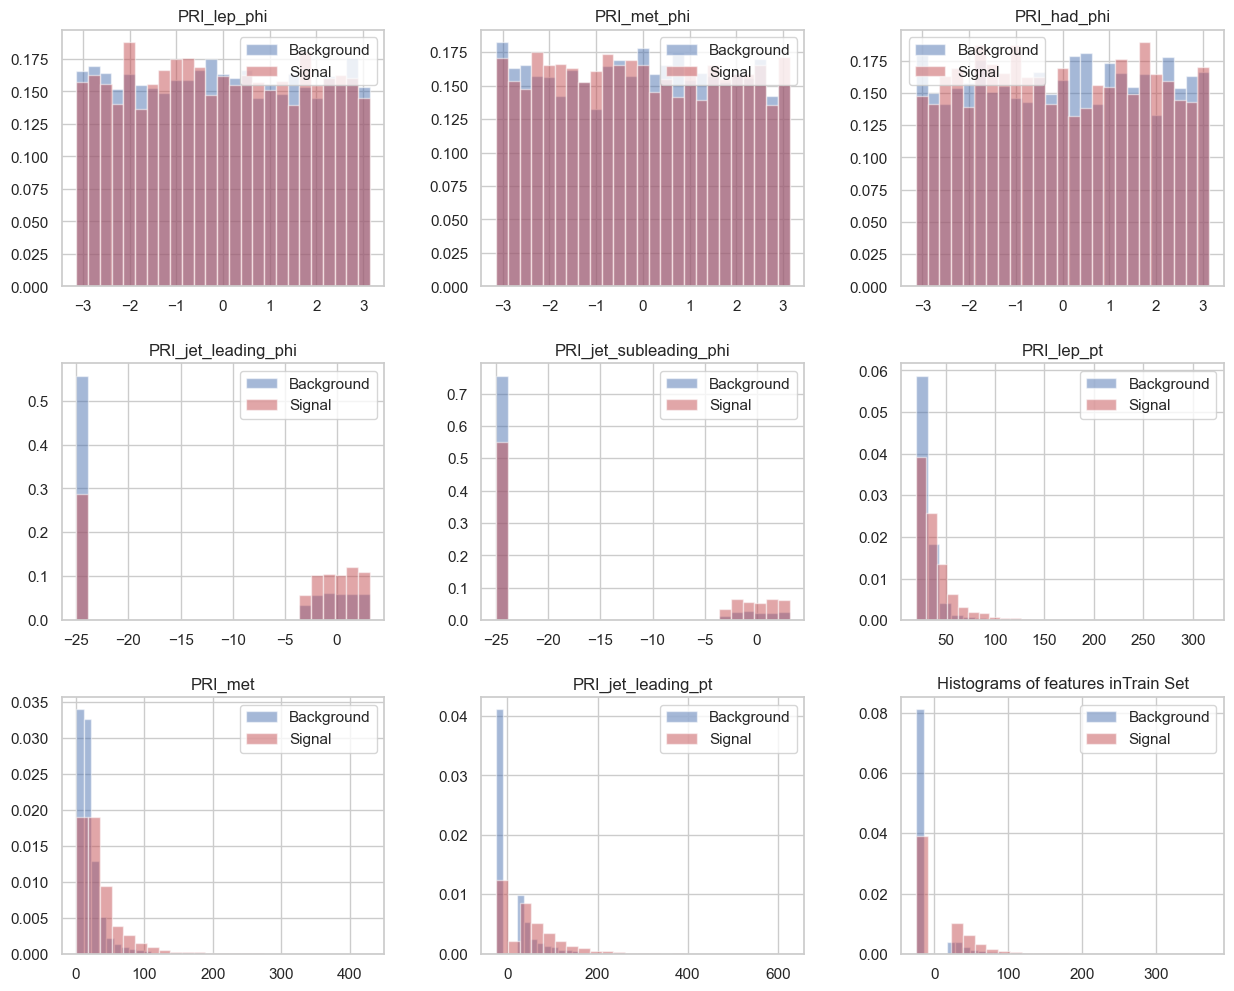

In [13]:
# Show data summary

train_visualize.histogram_dataset()

Signal feature  correlation matrix


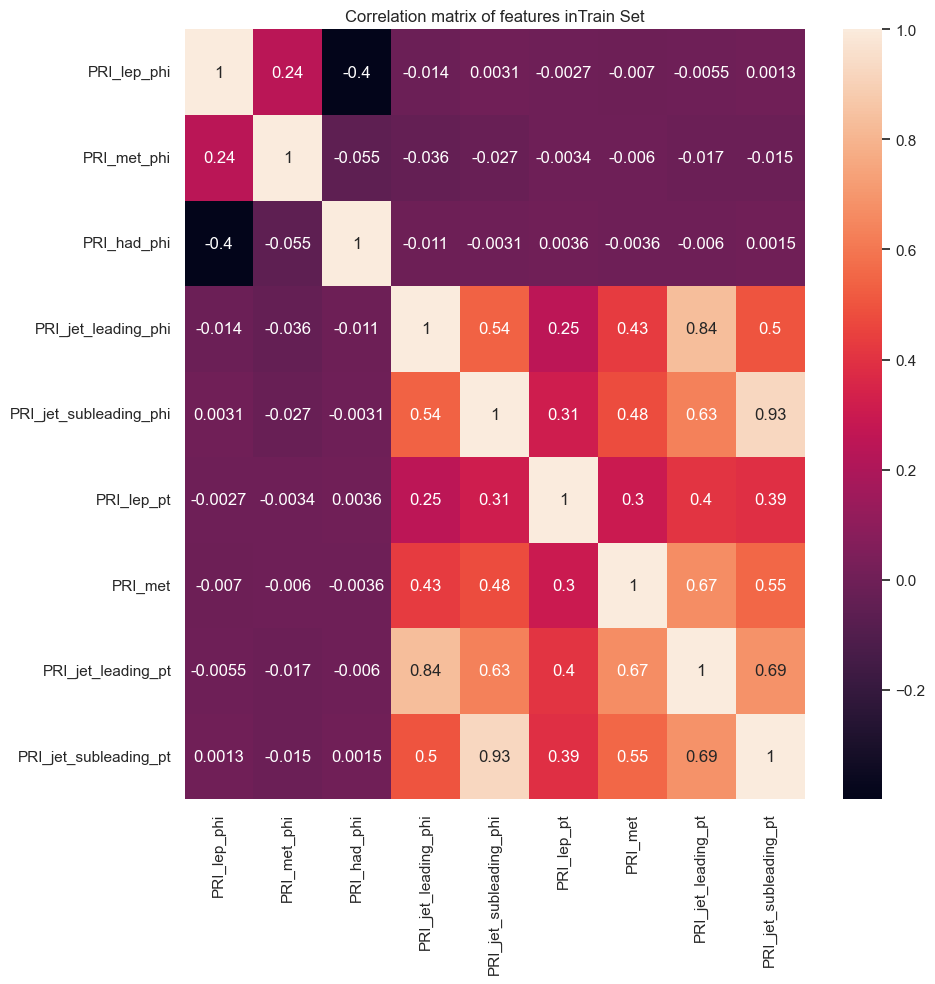

Background feature  correlation matrix


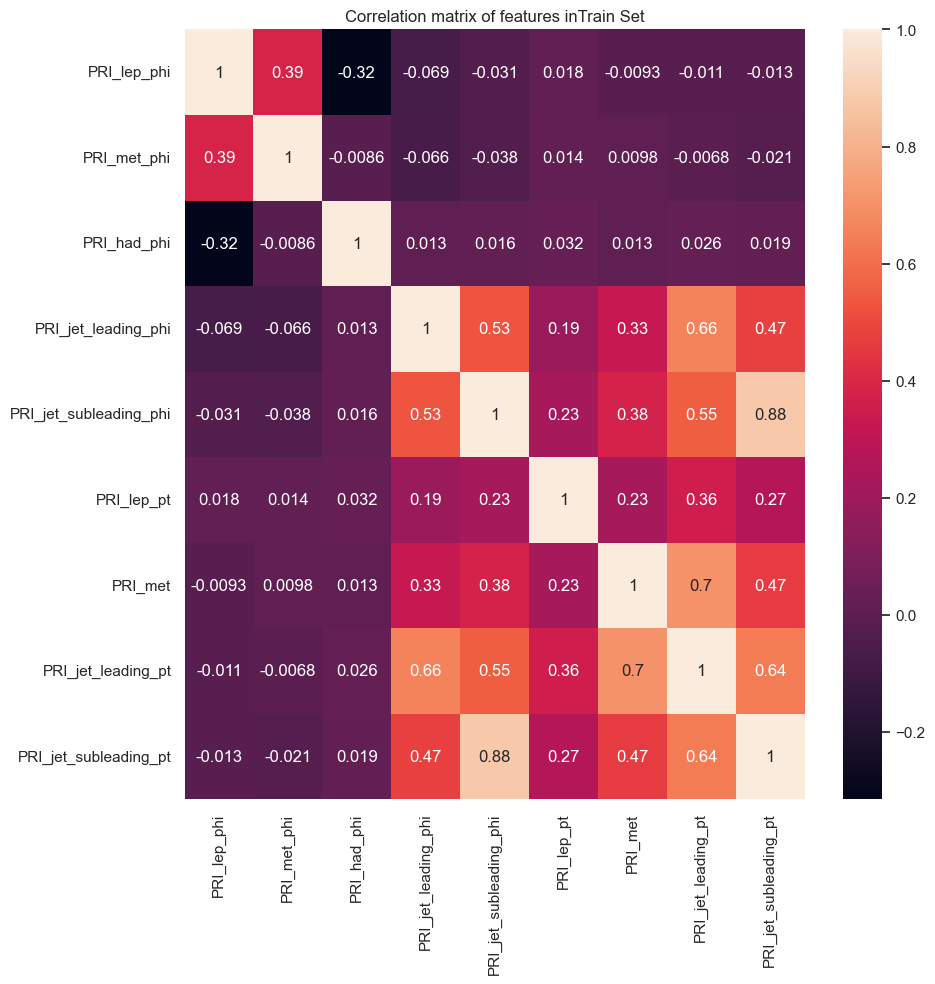

In [14]:
train_visualize.correlation_plots(
    columns=[
        "PRI_lep_phi",
        "PRI_met_phi",
        "PRI_had_phi",
        "PRI_jet_leading_phi",
        "PRI_jet_subleading_phi",
        "PRI_lep_pt",
        "PRI_met",
        "PRI_jet_leading_pt",
        "PRI_jet_subleading_pt",
    ]
)

diboson (21,)
diboson (21,)
htautau (30,)
ttbar (271,)
ttbar (271,)
ztautau (6362,)
ztautau (6362,)


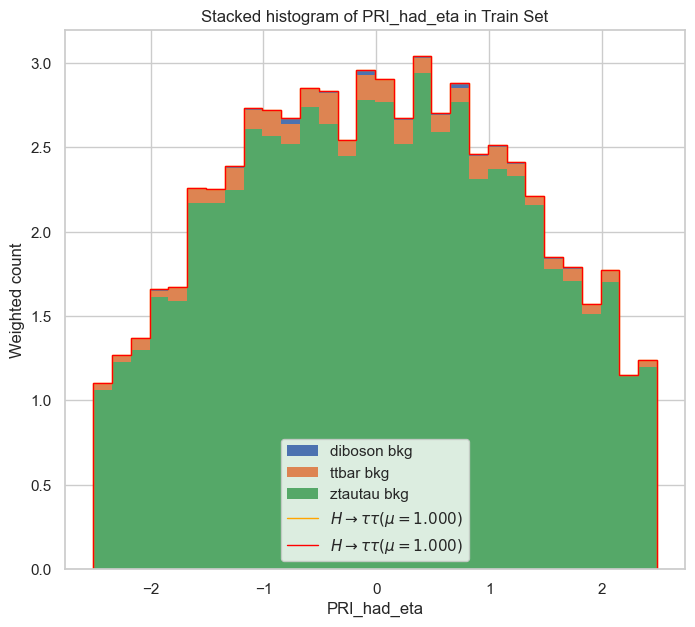

In [15]:
train_visualize.stacked_histogram("PRI_had_eta")

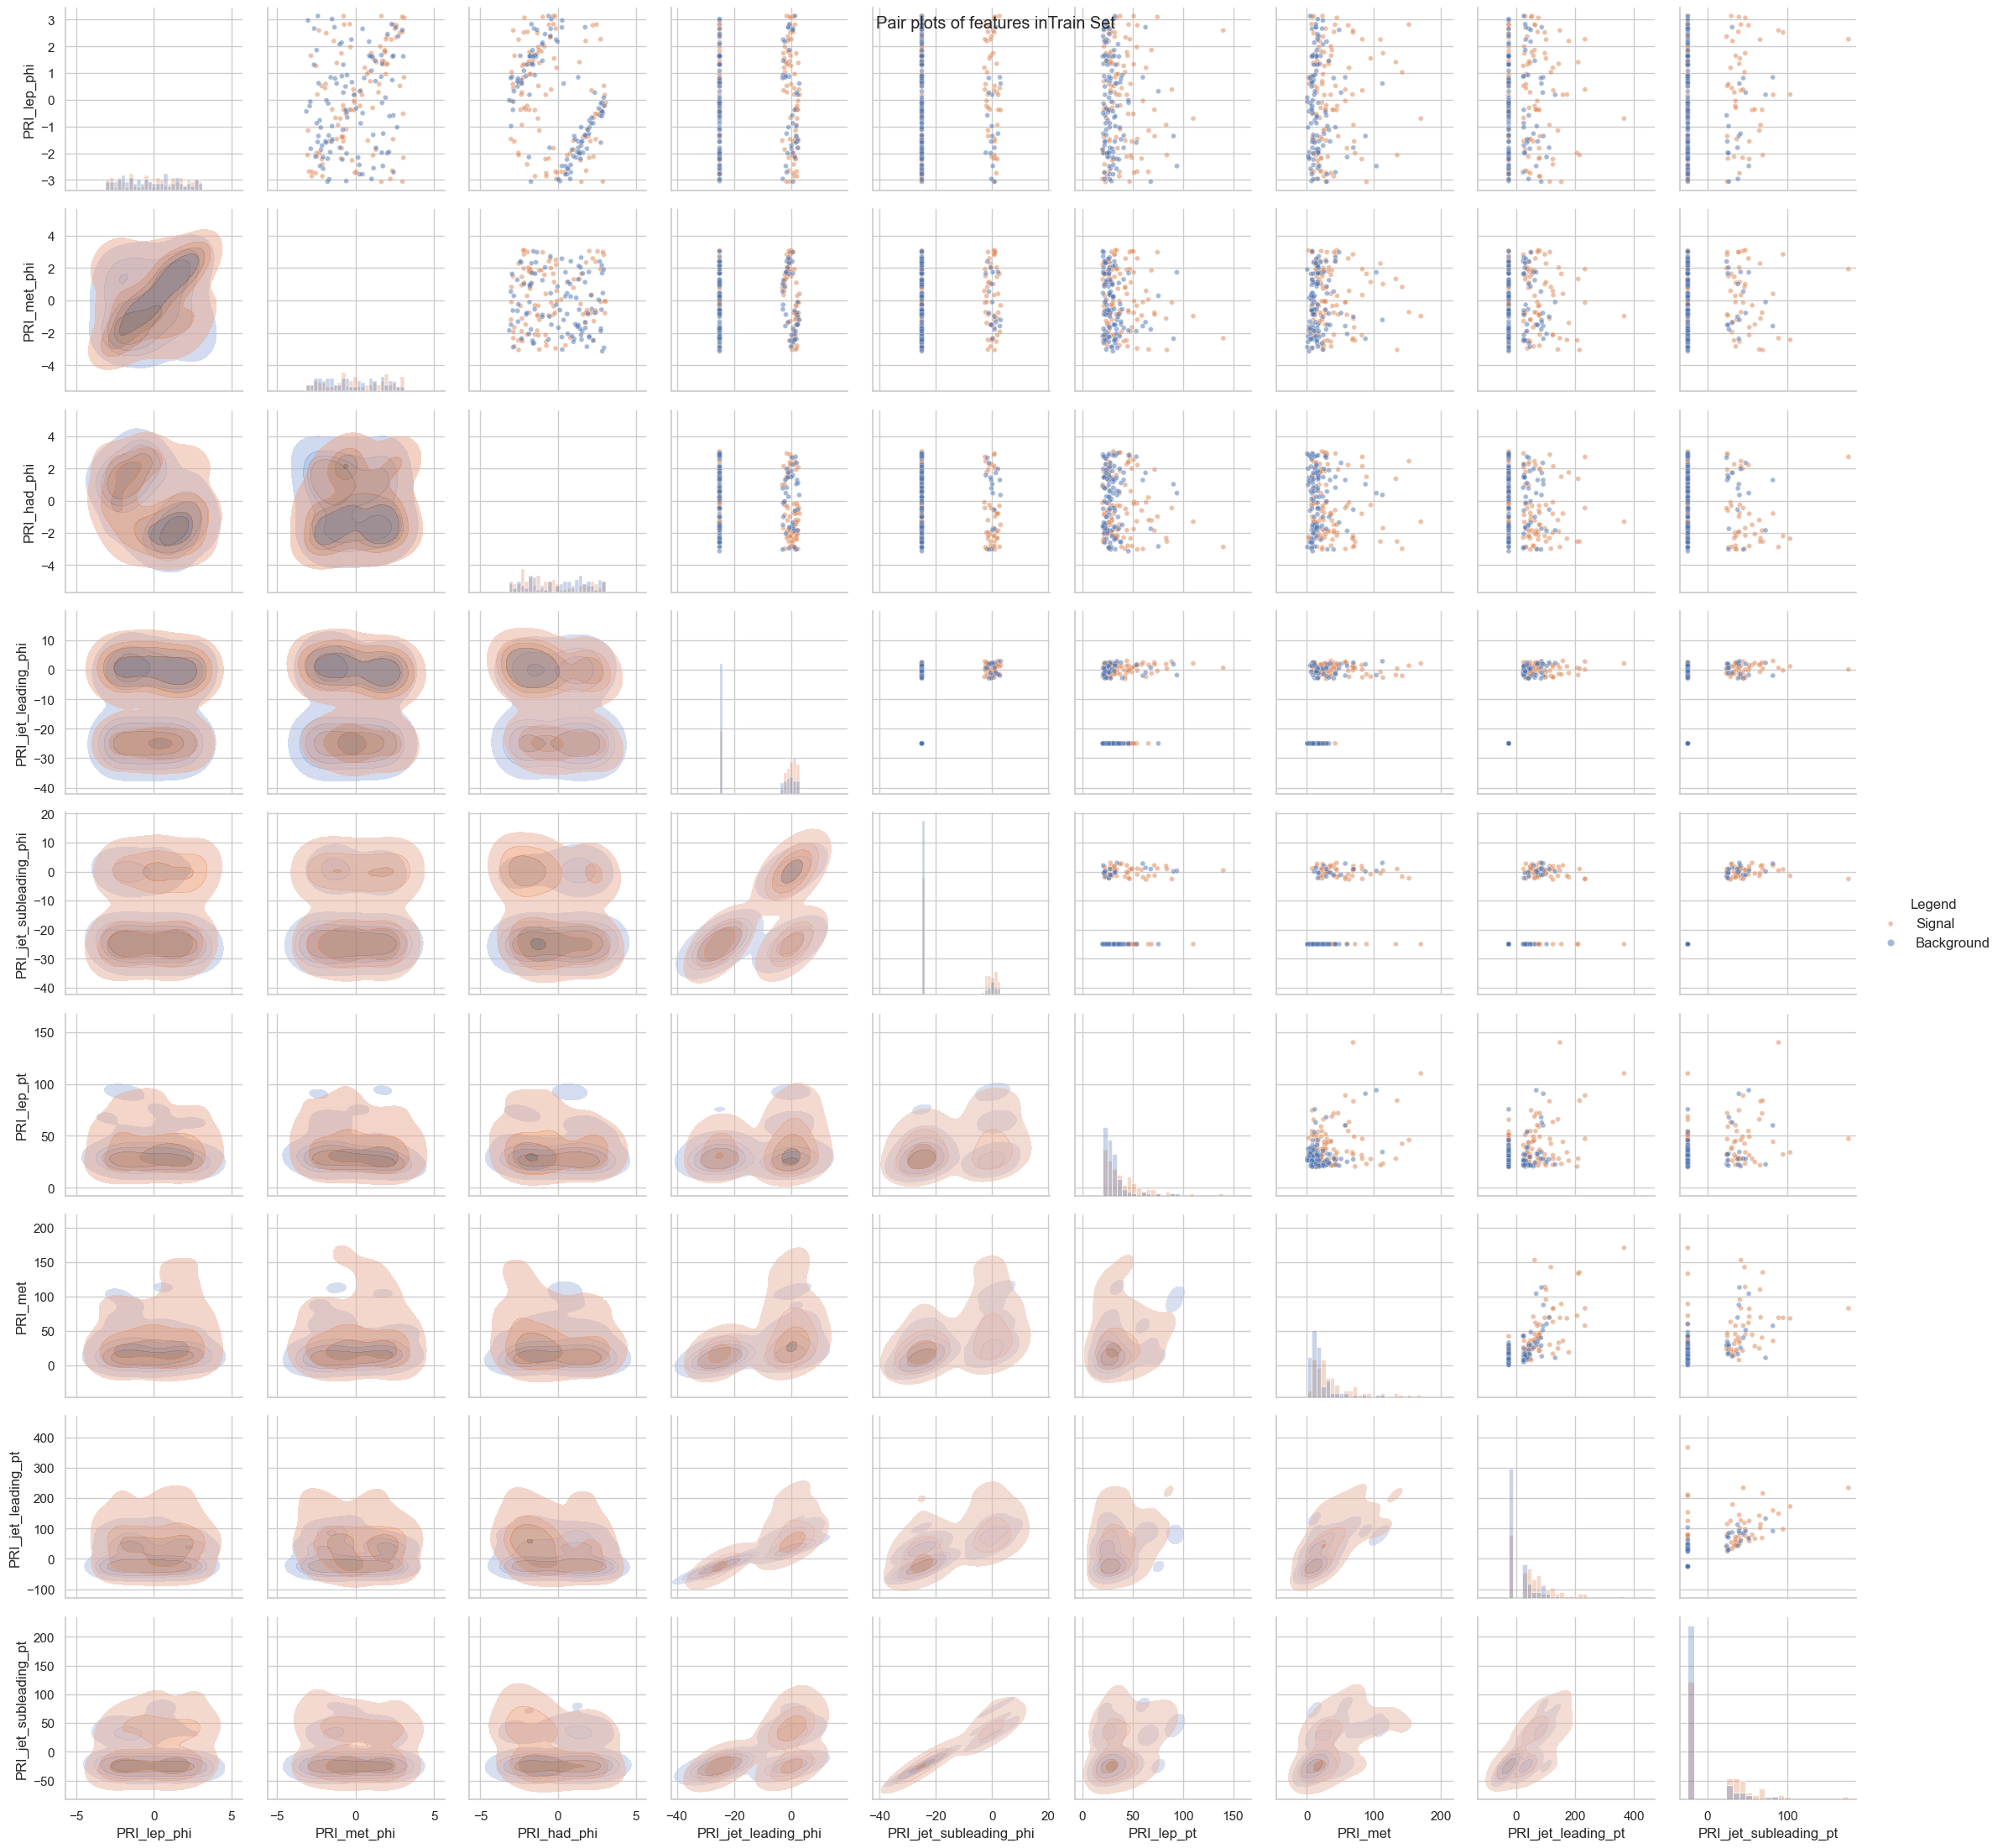

In [16]:
# Show data summary
train_visualize.pair_plots(sample_size=100)

### Test Settings
The Test setting sets the test conditions in ingestion.
This includes what systematics you want and how many psuedo experiments you want. 

In [ ]:
TEST_SETTINGS = {
    "systematics": {  # Systematics to use
        "tes": False,  # tau energy scale
        "jes": False,  # jet energy scale
        "soft_met": False,  # soft term in MET
        "ttbar_scale": False,  # W boson scale factor
        "diboson_scale": False,  # Diboson scale factor
        "bkg_scale": False,  # Background scale factor
    },
    "num_pseudo_experiments": 10,  # Number of pseudo-experiments to run per set
    "num_of_sets": 2,  # Number of sets of pseudo-experiments to run
}

USE_RANDOM_MUS = True
RANDOM_SEED = 42

In [ ]:
test_settings = TEST_SETTINGS.copy()

if USE_RANDOM_MUS:
    random_state = np.random.RandomState(RANDOM_SEED)
    test_settings["ground_truth_mus"] = (
        random_state.uniform(0.1, 3, test_settings["num_of_sets"])
    ).tolist()
    test_settings["random_mu"] = True
    random_settings_file = os.path.join(output_dir, "test_settings.json")
    with open(random_settings_file, "w") as f:
        json.dump(test_settings, f)
else:
    test_settings["ground_truth_mus"] = data.ground_truth_mus


### Ingestion



In [17]:

from HiggsML.ingestion import Ingestion

ingestion = Ingestion(data)


In [18]:

# initialize submission
ingestion.init_submission(Model)

2025-04-02 15:41:21,281 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-04-02 15:41:35,370 - HiggsML.datasets     - INFO     - Sampled train data shape: (50000, 16)
2025-04-02 15:41:35,372 - HiggsML.datasets     - INFO     - Sampled train labels shape: (50000,)
2025-04-02 15:41:35,374 - HiggsML.datasets     - INFO     - Sampled train weights shape: (50000,)
2025-04-02 15:41:35,375 - HiggsML.datasets     - INFO     - Sampled train detailed labels shape: (50000,)
2025-04-02 15:41:35,389 - HiggsML.datasets     - INFO     - Train data loaded successfully
2025-04-02 15:41:49,376 - HiggsML.datasets     - INFO     - Sampled train data shape: (50000, 16)
2025-04-02 15:41:49,377 - HiggsML.datasets     - INFO     - Sampled train labels shape: (50000,)
2025-04-02 15:41:49,377 - HiggsML.datasets     - INFO     - Sampled train weights shape: (50000,)
2025-04-02 15:41:49,378 - HiggsML.datasets     - INFO     - Sampled train detailed labels shape: (50000,)
2025-04-02 15:41:49,38

Training Data:  (50000, 16)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  1017.2388686807893
sum_bkg_weights:  1049389.0621194884

Valid Data:  (50000, 16)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  1010.6051790309
sum_bkg_weights:  1052786.38088212

Holdout Data:  (50000, 16)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  1009.1438286457685
sum_bkg_weights:  1053554.8364035552
 
 
Training Data:  (50000, 17)
Model is BDT


2025-04-02 15:42:02,281 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model


score shape before threshold (50000,)
score shape after threshold (50000,)
saved_info {'beta': 212158.4820966485, 'gamma': 728.6286101118035}
Train Results: 
	 mu_hat  :  -112.08030624314681
	 del_mu_stat  :  0.633240180149156
	 del_mu_sys  :  11.20803062431468
	 del_mu_tot  :  11.225905023708826
Holdout Results: 
	 mu_hat  :  1.000000000000078
	 del_mu_stat  :  0.633240180149156
	 del_mu_sys  :  0.1000000000000078
	 del_mu_tot  :  0.6410874556215689
Valid Results: 
	 mu_hat  :  0.7783012013810071
	 del_mu_stat  :  0.633240180149156
	 del_mu_sys  :  0.07783012013810071
	 del_mu_tot  :  0.6380052142075695
[*] --- Dataset name : Train Set
[*] --- Number of events : 50000
[*] --- Number of features : 18
   diboson   3757.663306166679
   htautau   1010.6051790309
   ttbar   42743.14495465635
   ztautau   1006285.5726212971
[*] --- Number of signal events : 16475
[*] --- Number of background events : 33525
[*] --- Examples of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_n_jets,PRI_jet_all_pt,PRI_met,PRI_met_phi,derived_feature,score
0,20.403999,-0.319,2.886,29.427000,1.513,0.069,30.408001,-0.614,-1.015,-25.000000,-25.000,-25.000,1.0,30.408001,45.869999,2.326,49.831001,0.668536
1,25.115999,-0.228,2.889,29.495001,-0.430,-0.399,-25.000000,-25.000,-25.000,-25.000000,-25.000,-25.000,0.0,0.000000,8.238000,-2.773,54.611000,0.146992
2,33.379002,0.590,1.090,60.688999,0.965,-2.231,-25.000000,-25.000,-25.000,-25.000000,-25.000,-25.000,0.0,0.000000,4.969000,-0.960,94.068001,0.851825
3,26.346001,0.539,-0.449,32.116001,0.667,-1.990,81.966003,-0.727,2.217,28.134001,0.322,3.037,2.0,110.099998,70.804001,-0.617,58.462002,0.869992
4,44.319000,1.003,3.062,52.966000,0.582,-1.746,229.951996,-0.358,0.301,71.307999,2.362,2.585,2.0,301.260010,102.327003,-2.561,97.285004,0.877247


[*] --- Description of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_n_jets,PRI_jet_all_pt,PRI_met,PRI_met_phi,derived_feature,score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.048405,0.003953,0.012066,42.879055,0.000062,-0.002010,20.793053,-13.046662,-13.049374,-8.478820,-19.404112,-19.405735,0.851900,50.461861,25.012657,0.009885,76.927460,0.419273
std,18.064558,1.224291,1.813924,20.706423,1.247541,1.809336,63.330921,12.557016,12.543642,34.532028,10.481937,10.462120,1.161772,89.533424,27.803890,1.812128,29.859522,0.301004
min,20.000000,-2.500000,-3.142000,22.986000,-2.627000,-3.142000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,0.000000,0.000000,0.024000,-3.142000,43.555000,0.000819
25%,23.962749,-0.948000,-1.557000,30.694250,-0.981000,-1.570000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,0.000000,0.000000,9.782000,-1.556000,59.713247,0.151357
50%,29.058001,0.003000,0.017000,38.051998,0.005000,-0.017000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,0.000000,0.000000,16.927000,0.018000,69.490002,0.328064
75%,37.242250,0.960000,1.573000,48.009998,0.973000,1.550000,47.741499,-0.142000,-0.176000,-25.000000,-25.000000,-25.000000,1.000000,64.121502,29.008749,1.571000,83.929750,0.696281
max,393.697998,2.500000,3.142000,533.945007,2.654000,3.141000,1251.310059,4.887000,3.141000,1107.060059,4.932000,3.142000,10.000000,2503.729980,414.252991,3.142000,680.332031,0.998795


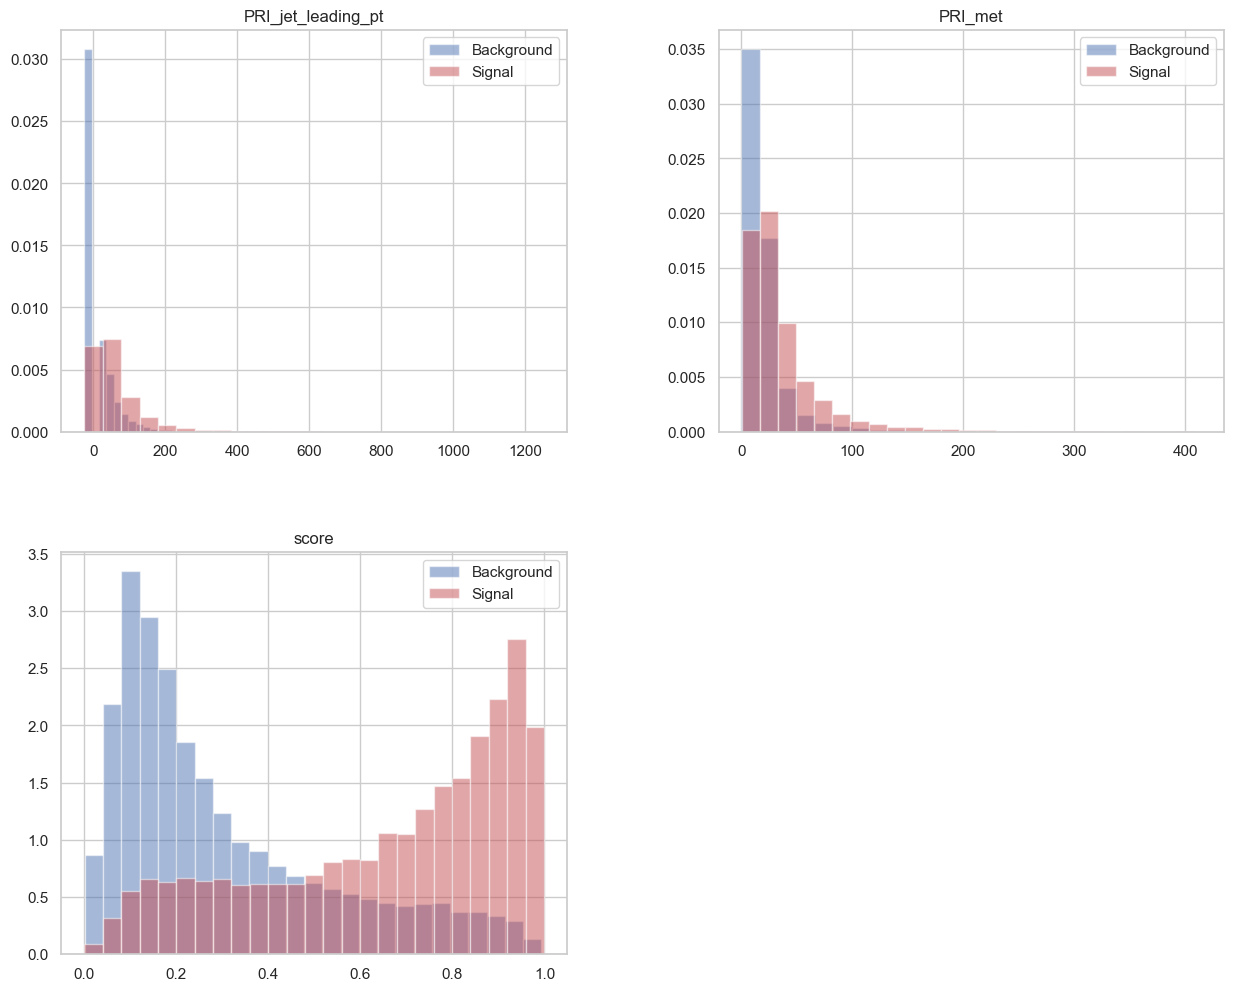

diboson (120,)
diboson (120,)
htautau (30,)
ttbar (1361,)
ttbar (1361,)
ztautau (32044,)
ztautau (32044,)


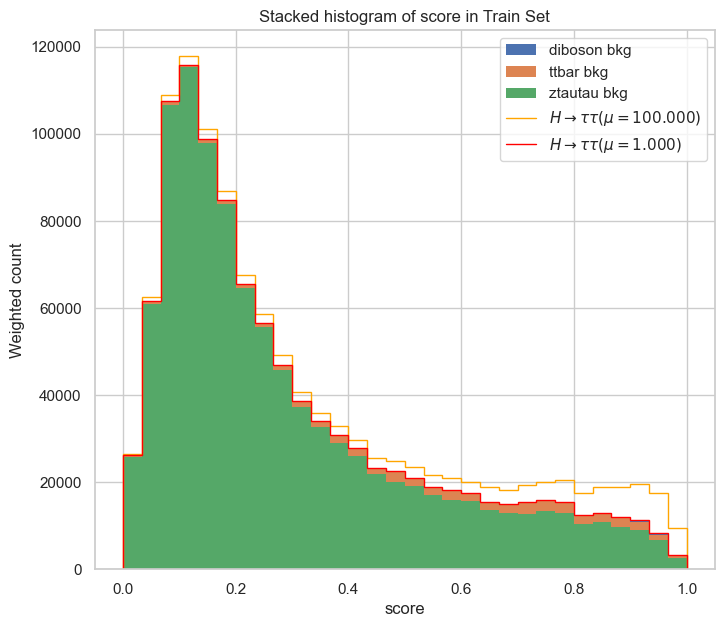

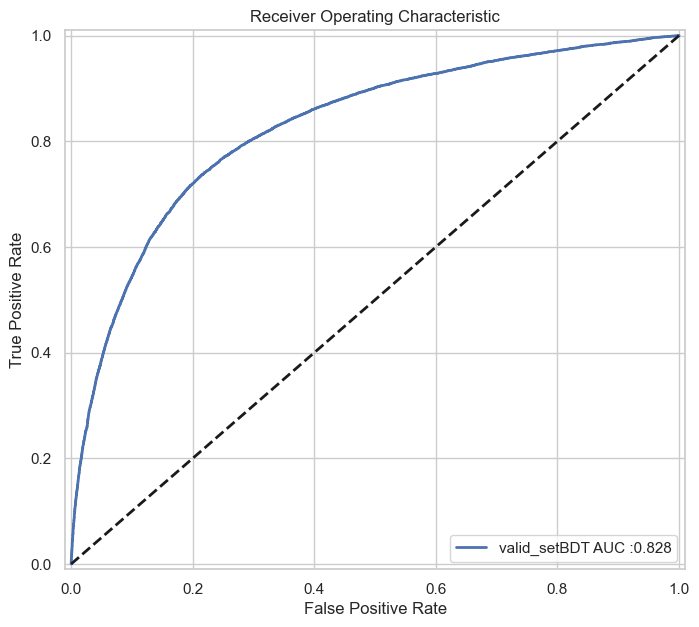

In [19]:

# fit submission
ingestion.fit_submission()

In [20]:

# load test set
data.load_test_set()

2025-04-02 15:42:20,043 - HiggsML.datasets     - INFO     - Test data loaded successfully


In [21]:

# predict submission
ingestion.predict_submission(test_settings)

2025-04-02 15:42:20,070 - HiggsML.ingestion    - INFO     - Calling predict method of submitted model with seed: 31415


Test Results:  {'mu_hat': -19.95046844841569, 'del_mu_stat': 0.633240180149156, 'del_mu_sys': 1.9950468448415692, 'del_mu_tot': 2.093132828768312}
Test Results:  {'mu_hat': -21.460153883127365, 'del_mu_stat': 0.633240180149156, 'del_mu_sys': 2.1460153883127364, 'del_mu_tot': 2.237493055325625}
Test Results:  {'mu_hat': -22.42772500264712, 'del_mu_stat': 0.633240180149156, 'del_mu_sys': 2.242772500264712, 'del_mu_tot': 2.330455237437304}
Test Results:  {'mu_hat': -22.057165850490616, 'del_mu_stat': 0.633240180149156, 'del_mu_sys': 2.205716585049062, 'del_mu_tot': 2.2948156307895045}
Test Results:  {'mu_hat': -20.42258825708916, 'del_mu_stat': 0.633240180149156, 'del_mu_sys': 2.0422588257089163, 'del_mu_tot': 2.1381801226606933}
Test Results:  {'mu_hat': -20.84667262011271, 'del_mu_stat': 0.633240180149156, 'del_mu_sys': 2.084667262011271, 'del_mu_tot': 2.17872226753593}
Test Results:  {'mu_hat': -20.563949711430343, 'del_mu_stat': 0.633240180149156, 'del_mu_sys': 2.0563949711430345, 'de

In [22]:
ingestion.process_results_dict()

In [23]:

# save result
ingestion.save_result(output_dir)

## Score
1. Compute Scores
2. Visualize Scores


In [25]:
from HiggsML.score import Scoring

In [26]:
# Initialize Score
score = Scoring()

In [27]:
print(output_dir)
score.load_ingestion_results(prediction_dir = output_dir, score_dir = output_dir)

2025-04-02 15:48:07,342 - HiggsML.score        - INFO     - Read ingestion results from /home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission


/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission


In [28]:
# Compute Score
score.compute_scores(test_settings)

2025-04-02 15:48:07,729 - HiggsML.score        - INFO     - Computing scores


KeyError: 'p16'

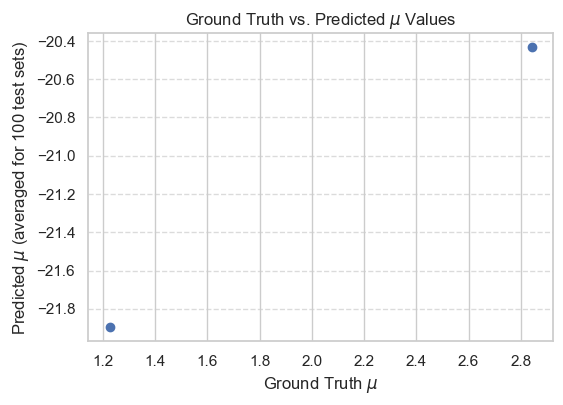

In [29]:
# Visualize scatter plot of ground truth mu and predicted mu
visualization.visualize_scatter(ingestion_result_dict=ingestion.results_dict, 
                  ground_truth_mus=test_settings["ground_truth_mus"])

## Submissions

In [ ]:
from zipfile import ZipFile, ZIP_DEFLATED
from contextlib import closing
# -------------------------------------
# Zip files
# -------------------------------------
def zipdir(archivename, basedir):
    '''Zip directory, from J.F. Sebastian http://stackoverflow.com/'''
    assert os.path.isdir(basedir)
    with closing(ZipFile(archivename, "w", ZIP_DEFLATED)) as z:
        for root, dirs, files in os.walk(basedir):
            # NOTE: ignore empty directories
            for fn in files:
                if fn[-4:] != '.zip' and fn != '.DS_Store':
                    absfn = os.path.join(root, fn)
                    zfn = absfn[len(basedir):]  # XXX: relative path
                    z.write(absfn, zfn)

### **Prepare the submission**

In [ ]:
import datetime
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
code_submission = 'BlackSwan-code_submission_' + the_date + '.zip'
zipdir(code_submission, submission_dir)
print("Submit : " + code_submission + " to the competition")


In [ ]:
!python3 -m HiggsML.score --prediction $output_dir --output $input_dir --refere

############################################
### Scoring Program
############################################

/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission/test_settings.json
Settings file not found. Please provide the settings file.
